In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
train_meta = pickle.load(open('../data/train/meta.pkl', 'rb'))
test_meta = pickle.load(open('../data/test/meta.pkl', 'rb'))

In [3]:
# # Calculate the correlation matrix
# corr_matrix = train_meta.corr()

# # Create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

# plt.show()

In [4]:
def plot_highly_correlated(df, target, threshold):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Select correlations above the threshold
    high_corr = corr_matrix[target][(corr_matrix[target].abs() >= threshold)]

    # Get columns to keep
    cols_to_keep = high_corr.index.tolist()

    # Calculate the correlation matrix for the selected columns
    high_corr_matrix = df[cols_to_keep].corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(high_corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

# Use the function
# print(train_meta['01088_A05_P010740_S00_N33_R1.mzML'][47994].keys())
# plot_highly_correlated(train_meta, 'target', 0.5)

In [7]:
# # Flatten the dictionary
# flat_data = []
# for mzml_file, scans in train_meta.items():
#     for scan_num, features in scans.items():
#         # Flatten features and add mzml_file and scan_num
#         flat_features = features.copy()
#         flat_features['mzml_file'] = mzml_file
#         flat_features['scan_num'] = scan_num
#         flat_data.append(flat_features)

df_list = []
for outer_key, inner_dict in train_meta.items():
    # Loop through inner dictionary
    for inner_key, df in inner_dict.items():
        # Create a copy of the dataframe to avoid modifying the original
        df_copy = df.copy()
        # Add outer and inner keys as columns
        df_copy['outer_key'] = outer_key
        df_copy['inner_key'] = inner_key
        # Append the dataframe to the list
        df_list.append(df_copy)

# Concatenate all dataframes in the list
full_df = pd.concat(df_list, ignore_index=True)

In [12]:
print(full_df.keys())
# print(full_df)

Index(['Charge', 'Peptide', 'Protein', 'DeNovoScore', 'MSGFScore',
       'SpecEValue', 'EValue', 'Label', 'outer_key', 'inner_key'],
      dtype='object')


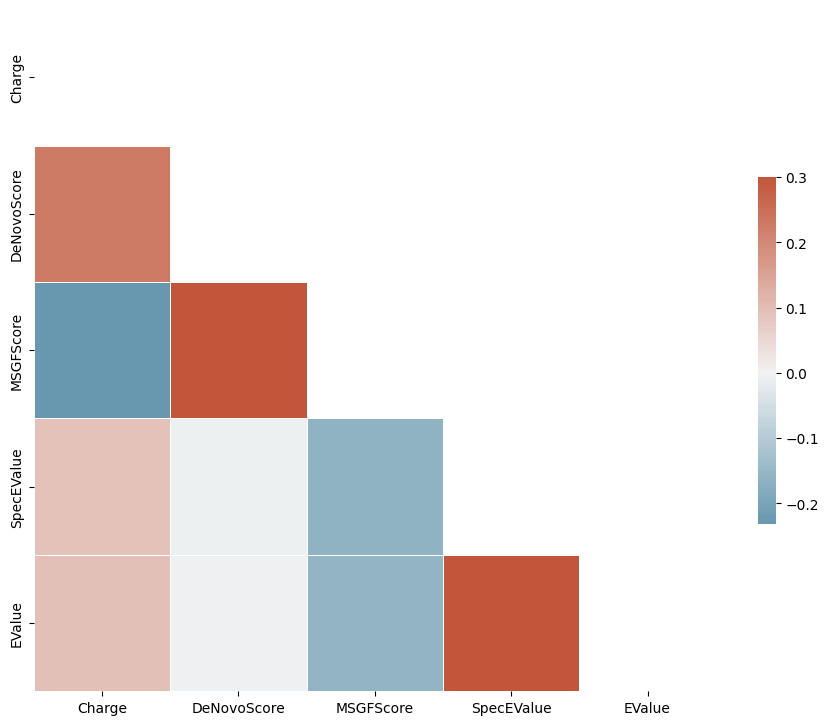

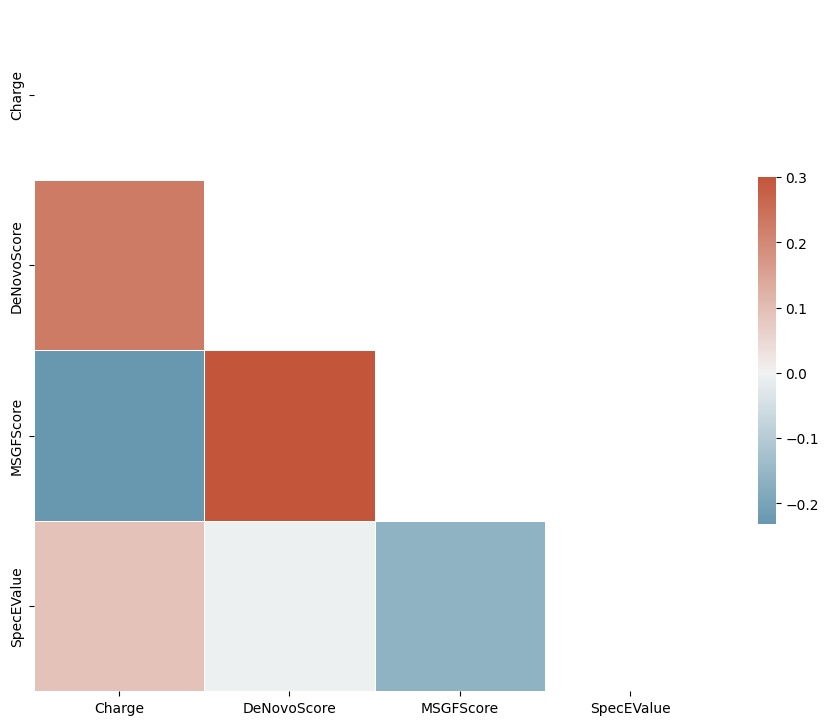

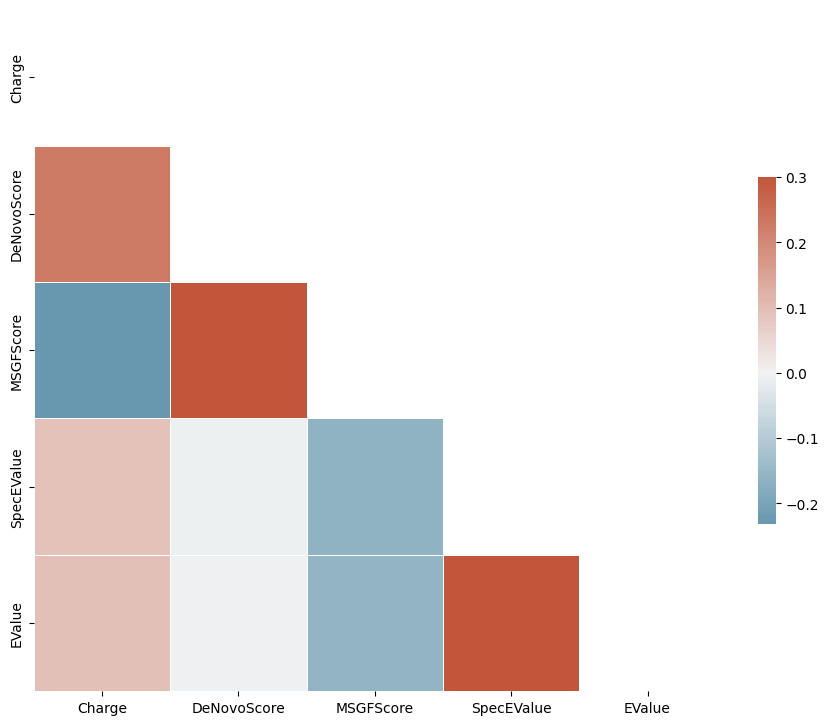

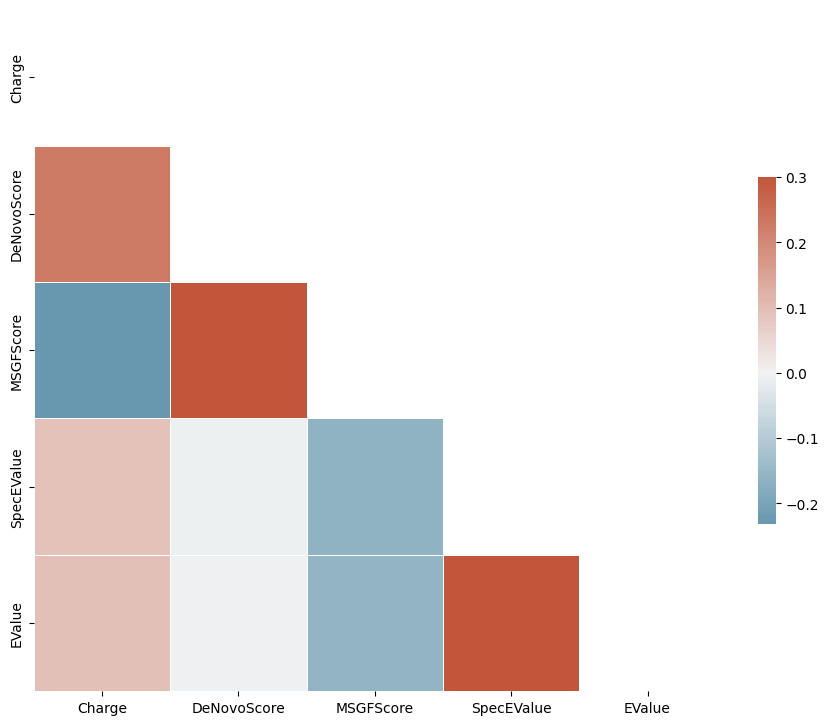

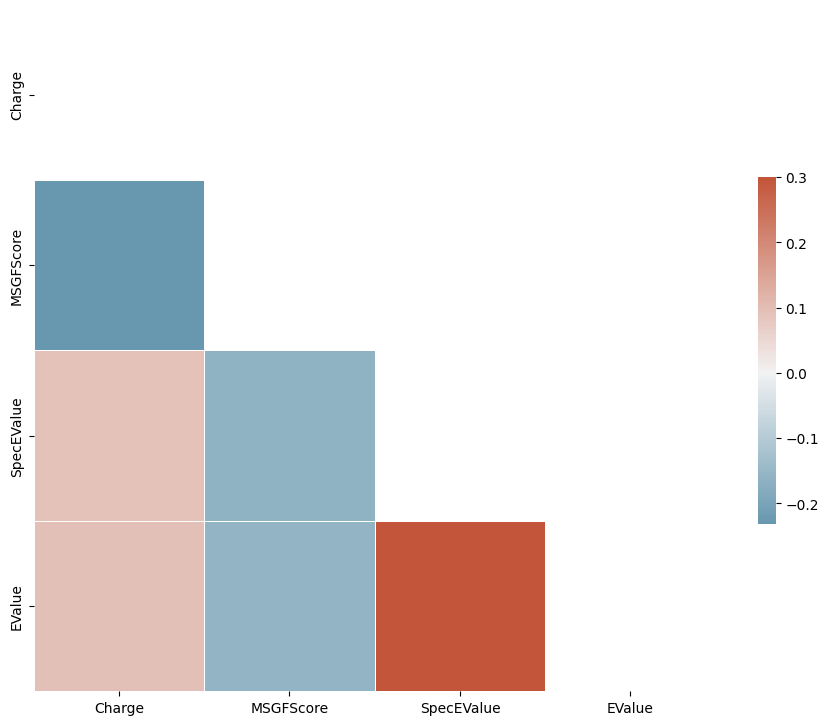

In [20]:
# Now you can use df_flat with the previous function
numerical_cols = ['Charge', 'DeNovoScore', 'MSGFScore', 'SpecEValue', 'EValue']
for col in numerical_cols:
    plot_highly_correlated(full_df[numerical_cols], col, 0.005)